# SUPPORT VECTOR MACHINES: INCOME DATASET

## Q1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

## Q2 Import dataset

In [2]:
a=pd.read_csv('income_evaluation.csv')

## Q3. Explore the data to gain insights about the data

In [3]:
a.shape

(32561, 15)

In [4]:
a.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
a.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
a.columns=a.columns.str.strip()
a.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
a.rename(columns={'education-num':'education_num','marital-status':'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hours_per_week','native-country':'native_country'},inplace=True)

In [8]:
a.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<Axes: >

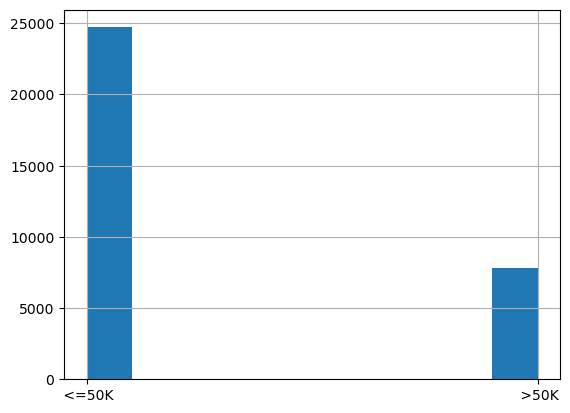

In [9]:
a['income'].hist()

([<matplotlib.patches.Wedge at 0x2313bd72e10>,
 [Text(-0.7999477838977984, 0.7550387692277803, '<=50'),
  Text(0.7999477838977981, -0.7550387692277808, '>=50')],
 [Text(-0.43633515485334456, 0.4118393286696983, '76%'),
  Text(0.43633515485334434, -0.4118393286696986, '24%')])

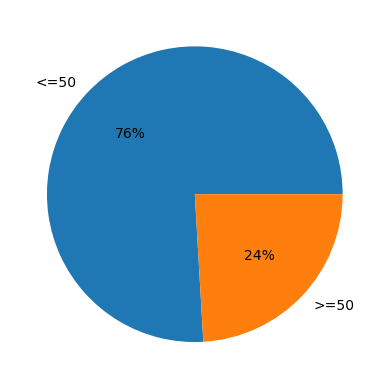

In [10]:
plt.pie(a['income'].value_counts()/len(a)*100,labels=['<=50','>=50'],autopct='%1.0f%%')

In [11]:
a.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
a.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
n=['object']
f=a.select_dtypes(include=n)
for i in f:
    print(f[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [14]:
a['workclass']=a['workclass'].str.strip()
a['occupation']=a['occupation'].str.strip()
a['native_country']=a['native_country'].str.strip()

In [15]:
a=a.replace('?',np.nan)

In [16]:
a['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<Axes: >

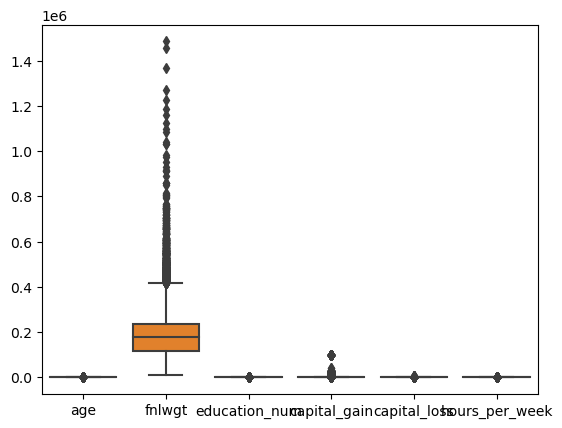

In [17]:
sns.boxplot(data=a)

In [18]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
a.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Q4. Check the distribution of variables

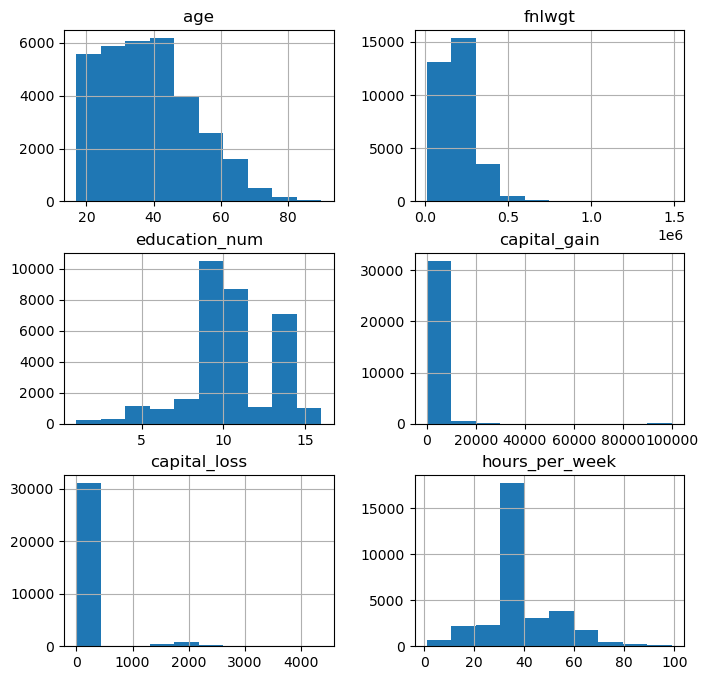

In [20]:
a.hist(figsize=(8,8))
plt.show()

## Q5. Feature Scaling

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a['workclass']=le.fit_transform(a['workclass'])
a['education']=le.fit_transform(a['education'])
a['occupation']=le.fit_transform(a['occupation'])
a['relationship']=le.fit_transform(a['relationship'])
a['native_country']=le.fit_transform(a['native_country'])

In [22]:
a=pd.get_dummies(a, columns = ['marital_status', 'race','sex'])
a.head()

,age,workclass,fnlwgt,education,education_num,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,6,77516,9,13,0,1,2174,0,40,38,<=50K,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,50,5,83311,9,13,3,0,0,0,13,38,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,38,3,215646,11,9,5,1,0,0,40,38,<=50K,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,3,234721,1,7,5,0,0,0,40,38,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,28,3,338409,9,13,9,5,0,0,40,4,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [23]:
a['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
a['income']=oe.fit_transform(a[['income']])

In [25]:
y=a['income']
a.drop('income',axis=1,inplace=True)

In [26]:
x=a
x

,age,workclass,fnlwgt,education,education_num,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,6,77516,9,13,0,1,2174,0,40,38,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,50,5,83311,9,13,3,0,0,0,13,38,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,38,3,215646,11,9,5,1,0,0,40,38,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,3,234721,1,7,5,0,0,0,40,38,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,28,3,338409,9,13,9,5,0,0,40,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,12,5,0,0,38,38,0,0,1,0,0,0,0,0,0,0,0,1,1,0
32557,40,3,154374,11,9,6,0,0,0,40,38,0,0,1,0,0,0,0,0,0,0,0,1,0,1
32558,58,3,151910,11,9,0,4,0,0,40,38,0,0,0,0,0,0,1,0,0,0,0,1,1,0
32559,22,3,201490,11,9,0,3,0,0,20,38,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.03067056,  1.65841165, -1.06361075, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.83710898,  1.02630576, -1.008707  , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-0.04264203, -0.23790601,  0.2450785 , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965, -0.23790601, -0.35877741, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.21564337, -0.23790601,  0.11095988, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.39419988,  0.92989258, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

## Q6. Split data into separate training and test set

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2,random_state=42)

## Q7. Run SVM with default hyperparameters 
##        Run SVM with rbf kernel and C=1.0 and gamma=auto 
##        Run SVM with rbf kernel and C=100.0
##        Run SVM with rbf kernel and C=1000.0

In [29]:
clf1 = svm.SVC()
clf2=svm.SVC(kernel='rbf',C=1,gamma='auto')
clf3=svm.SVC(kernel='rbf',C=100)
clf4=svm.SVC(kernel='rbf',C=1000)

## Q8. Run SVM with linear kernel
##    Run SVM with linear kernel and C=1.0
##    Run SVM with linear kernel and C=100.0
##    Run SVM with linear kernel and C=1000.0

In [30]:
clf5 = svm.SVC(kernel='linear')
clf6=svm.SVC(kernel='linear',C=1)
clf7=svm.SVC(kernel='linear',C=100)
clf8=svm.SVC(kernel='linear',C=1000)

## Q9. Run SVM with polynomial kernel
##    Run SVM with polynomial kernel and C=1.0
##    Run SVM with polynomial kernel and C=100.0
##    Run SVM with polynomial kernel and C=1000.0

In [31]:
clf9 = svm.SVC(kernel='polynomial')
clf10=svm.SVC(kernel='polynomial',C=1)
clf11=svm.SVC(kernel='polynomial',C=100)
clf12=svm.SVC(kernel='polynomial',C=1000)

## Q10. Run SVM with sigmoid kernel 
##    Run SVM with sigmoid kernel and C=1.0
##    Run SVM with sigmoid kernel and C=100.0
##    Run SVM with sigmoid kernel and C=1000.0

In [32]:
clf13 = svm.SVC(kernel='sigmoid')
clf14=svm.SVC(kernel='sigmoid',C=1)
clf15=svm.SVC(kernel='sigmoid',C=100)
clf16=svm.SVC(kernel='sigmoid',C=1000)

## Q11.Compare the train-set and test-set accuracy
## Q12.Check for overfitting and underfitting

In [33]:
classifiers = [
    svm.SVC(),
    svm.SVC(kernel='rbf', C=100),
    svm.SVC(kernel='rbf', C=1000),
    svm.SVC(kernel='sigmoid'),
    svm.SVC(kernel='sigmoid', C=1),
    svm.SVC(kernel='sigmoid', C=100),
    svm.SVC(kernel='sigmoid', C=1000)
]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

In [35]:
evaluation_results = []
j=1
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.decision_function(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    evaluation_results.append({
        "model": f"Model {i+1}",
        "confusion_matrix": cm,
        "classification_report": cr,
        "train_accuracy": clf.score(X_train, y_train),
        "test_accuracy": clf.score(X_test, y_test),
        "classification_accuracy": accuracy,
        "classification_error": error,
        "roc_auc": roc_auc,
        "roc_curve": (fpr, tpr)
    })
    print("model {} completed".format(j))
    j+=1


model 1 completed
model 2 completed
model 3 completed
model 4 completed
model 5 completed
model 6 completed
model 7 completed


In [36]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Test Accuracy : {result['test_accuracy']:.2f}")
    i+=1

model 1
Train Accuracy: 0.85
Test Accuracy : 0.85
model 2
Train Accuracy: 0.88
Test Accuracy : 0.85
model 3
Train Accuracy: 0.90
Test Accuracy : 0.83
model 4
Train Accuracy: 0.79
Test Accuracy : 0.79
model 5
Train Accuracy: 0.79
Test Accuracy : 0.79
model 6
Train Accuracy: 0.79
Test Accuracy : 0.79
model 7
Train Accuracy: 0.79
Test Accuracy : 0.79


## Q13. visualize confusion matrix with seaborn heatmap

Model: Model 1
Confusion Matrix:


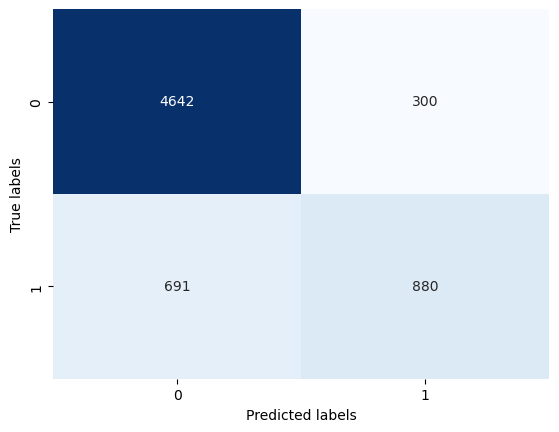

Model: Model 2
Confusion Matrix:


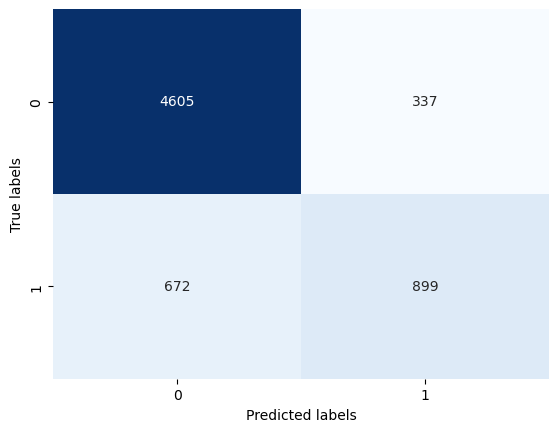

Model: Model 3
Confusion Matrix:


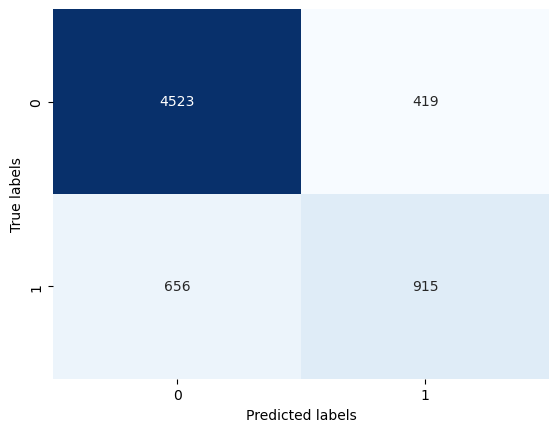

Model: Model 4
Confusion Matrix:


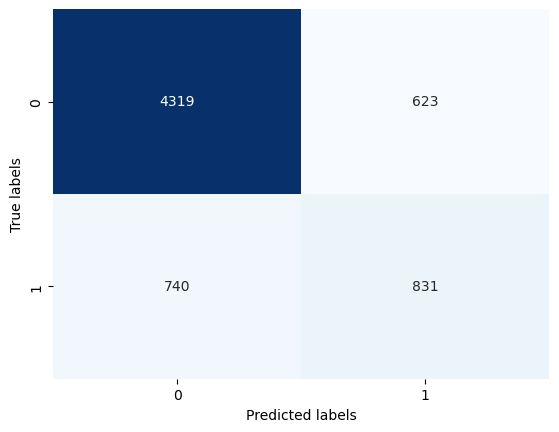

Model: Model 5
Confusion Matrix:


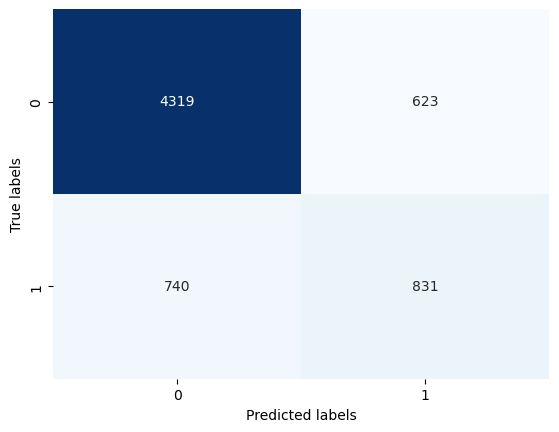

Model: Model 6
Confusion Matrix:


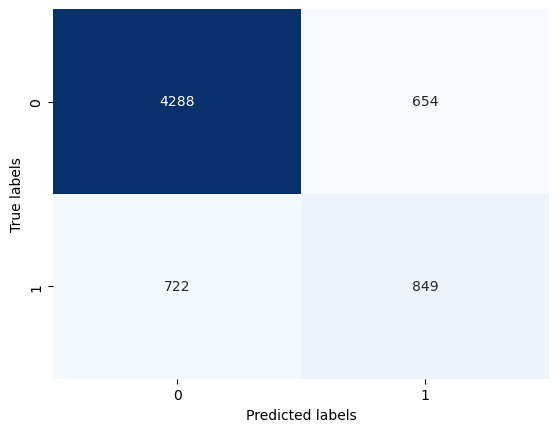

Model: Model 7
Confusion Matrix:


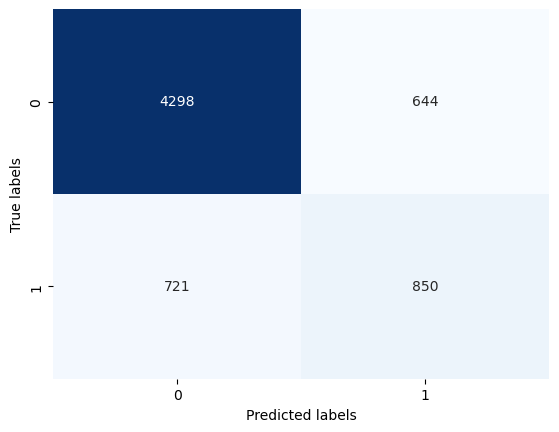

In [37]:
for result in evaluation_results:
    print(f"Model: {result['model']}")
    print("Confusion Matrix:")
    plt.figure()
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
   

## Q14. Generate classification report 

In [38]:
i=1
for result in evaluation_results:
    print("model {} Classification Report:".format(i))
    print(result['classification_report'])
    i+=1
    

model 1 Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4942
         1.0       0.75      0.56      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513

model 2 Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      4942
         1.0       0.73      0.57      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513

model 3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      4942
         1.0       0.69      0.58      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.75  

## Q15. Evaluate classification accuracy
## Q16. Evaluate Classification error

In [39]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(f"Classification Accuracy: {result['classification_accuracy']:.2f}")
    print(f"Classification Error: {result['classification_error']:.2f}")
    i+=1
    

model 1
Classification Accuracy: 0.85
Classification Error: 0.15
model 2
Classification Accuracy: 0.85
Classification Error: 0.15
model 3
Classification Accuracy: 0.83
Classification Error: 0.17
model 4
Classification Accuracy: 0.79
Classification Error: 0.21
model 5
Classification Accuracy: 0.79
Classification Error: 0.21
model 6
Classification Accuracy: 0.79
Classification Error: 0.21
model 7
Classification Accuracy: 0.79
Classification Error: 0.21


## Q17. Plot ROC Curve
## Q18. Compute ROC AUC

model 1


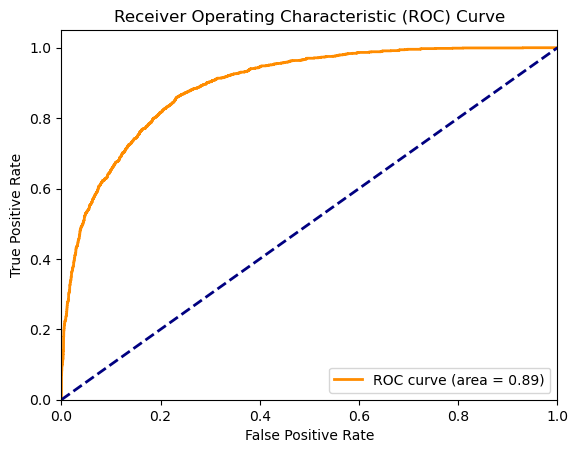

model 2


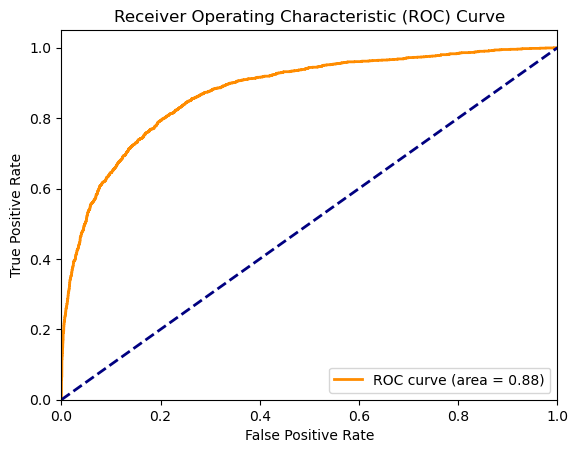

model 3


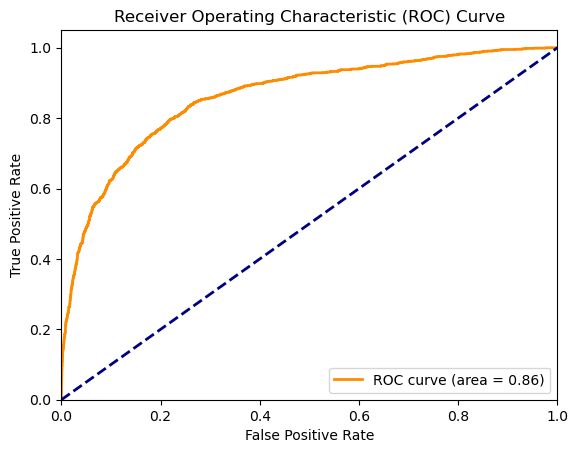

model 4


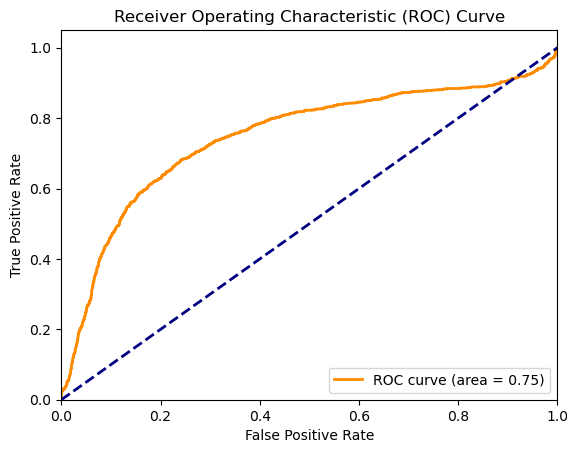

model 5


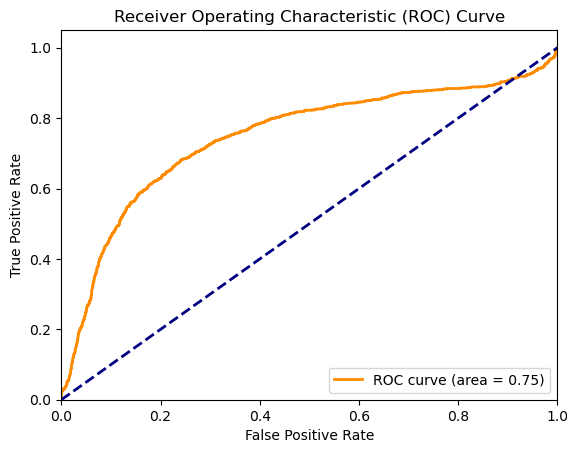

model 6


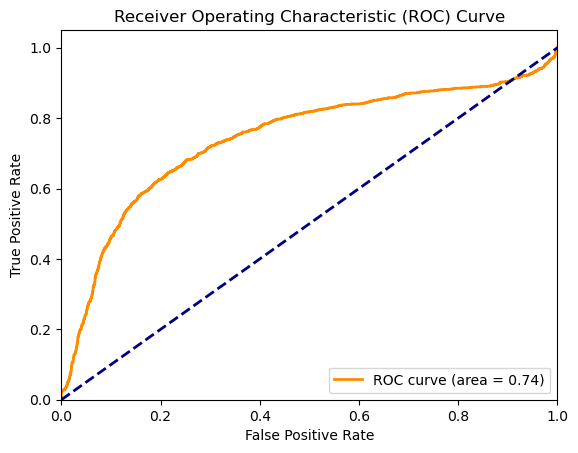

model 7


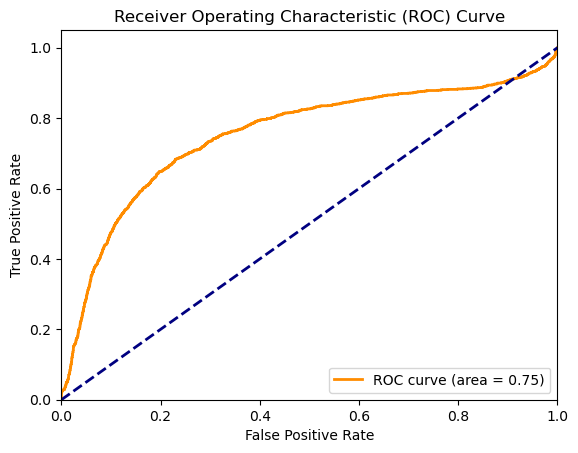

In [40]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    plt.figure()
    plt.plot(result['roc_curve'][0], result['roc_curve'][1], color='darkorange', lw=2, label=f'ROC curve (area = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    i+=1

In [41]:
i=1
for result in evaluation_results:
    print("model {}".format(i))
    print(result['roc_auc'])
    i+=1

model 1
0.8936105674970332
model 2
0.8754277821327011
model 3
0.8607141375925085
model 4
0.7458791877568464
model 5
0.7458791877568464
model 6
0.7414393984864787
model 7
0.7512384912599136


## Q19.Stratified k-fold cross-validation with shuffle split with rbf kernel

In [42]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC
n_splits = 5
n_shuffles = 5
svm_rbf = SVC(kernel='rbf')
skf = StratifiedKFold(n_splits=n_splits)
sss = StratifiedShuffleSplit(n_splits=n_shuffles, test_size=0.2, random_state=42)

In [43]:
# Stratified k-fold cross-validation
cv_scores_skf = cross_val_score(svm_rbf, x, y, cv=skf)
print(f"Stratified k-fold cross-validation scores: {cv_scores_skf}")
print(f"Mean accuracy (k-fold): {cv_scores_skf.mean()}")

Stratified k-fold cross-validation scores: [0.79548595 0.79376536 0.79499386 0.79683661 0.79422604]
Mean accuracy (k-fold): 0.7950615636992883


In [44]:
# Stratified shuffle split
cv_scores_sss = cross_val_score(svm_rbf, x, y, cv=sss)
print(f"Stratified shuffle split scores: {cv_scores_sss}")
print(f"Mean accuracy (shuffle split): {cv_scores_sss.mean()}")

Stratified shuffle split scores: [0.79610011 0.79824965 0.79072624 0.79456472 0.79456472]
Mean accuracy (shuffle split): 0.7948410870566558


##  Q20. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [45]:
svm_sigmoid = SVC(kernel='sigmoid')
# Stratified k-fold cross-validation
cv_scores_skf = cross_val_score(svm_sigmoid, x, y, cv=skf)
print(f"Stratified k-fold cross-validation scores: {cv_scores_skf}")
print(f"Mean accuracy (k-fold): {cv_scores_skf.mean()}")

Stratified k-fold cross-validation scores: [0.65453708 0.63943489 0.64281327 0.64496314 0.65202703]
Mean accuracy (k-fold): 0.6467550817850218


In [46]:
# Stratified shuffle split
cv_scores_sss = cross_val_score(svm_sigmoid, x, y, cv=sss)
print(f"Stratified shuffle split scores: {cv_scores_sss}")
print(f"Mean accuracy (shuffle split): {cv_scores_sss.mean()}")

Stratified shuffle split scores: [0.63519116 0.63626593 0.65284815 0.64824198 0.64424996]
Mean accuracy (shuffle split): 0.6433594349762014
